In [1]:
import pandas as pd
import numpy as np
import uproot4
import awkward as ak
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve

In [2]:
#Loading the trees
file_pion=uproot4.open("testpi.root")
tree_pion=file_pion['events']

file_elec=uproot4.open("testelec.root")
tree_elec=file_elec['events']

In [3]:
#For Pions
posX_pion= tree_pion['ForwardTRDHits/ForwardTRDHits.position.x'].array()
posY_pion= tree_pion['ForwardTRDHits/ForwardTRDHits.position.y'].array()
posZ_pion= tree_pion['ForwardTRDHits/ForwardTRDHits.position.z'].array()
ene_pion= tree_pion['ForwardTRDHits/ForwardTRDHits.energyDeposit'].array()*(10**6)
momX_pion= tree_pion['ForwardTRDHits/ForwardTRDHits.momentum.x'].array()
momY_pion= tree_pion['ForwardTRDHits/ForwardTRDHits.momentum.y'].array()
momZ_pion= tree_pion['ForwardTRDHits/ForwardTRDHits.momentum.z'].array()
length_pion= tree_pion['ForwardTRDHits/ForwardTRDHits.length'].array()
time_pion= tree_pion['ForwardTRDHits/ForwardTRDHits.truth.time'].array()


flatPosX_pion=ak.flatten(posX_pion)
flatPosY_pion=ak.flatten(posY_pion)
flatPosZ_pion=ak.flatten(posZ_pion)
flatEne_pion=ak.flatten(ene_pion) #to keV
flatMomX_pion=ak.flatten(momX_pion)
flatMomY_pion=ak.flatten(momY_pion)
flatMomZ_pion=ak.flatten(momZ_pion)
flatLength_pion=ak.flatten(length_pion)
flatTime_pion=ak.flatten(time_pion)

In [4]:
#For electrons
posX_elec= tree_elec['ForwardTRDHits/ForwardTRDHits.position.x'].array()
posY_elec= tree_elec['ForwardTRDHits/ForwardTRDHits.position.y'].array()
posZ_elec= tree_elec['ForwardTRDHits/ForwardTRDHits.position.z'].array()
ene_elec= tree_elec['ForwardTRDHits/ForwardTRDHits.energyDeposit'].array()*(10**6)
momX_elec= tree_elec['ForwardTRDHits/ForwardTRDHits.momentum.x'].array()
momY_elec= tree_elec['ForwardTRDHits/ForwardTRDHits.momentum.y'].array()
momZ_elec= tree_elec['ForwardTRDHits/ForwardTRDHits.momentum.z'].array()
length_elec= tree_elec['ForwardTRDHits/ForwardTRDHits.length'].array()
time_elec= tree_elec['ForwardTRDHits/ForwardTRDHits.truth.time'].array()

flatPosX_elec=ak.flatten(posX_elec)
flatPosY_elec=ak.flatten(posY_elec)
flatPosZ_elec=ak.flatten(posZ_elec)
flatEne_elec=ak.flatten(ene_elec) #to keV
flatMomX_elec=ak.flatten(momX_elec)
flatMomY_elec=ak.flatten(momY_elec)
flatMomZ_elec=ak.flatten(momZ_elec)
flatLength_elec=ak.flatten(length_elec)
flatTime_elec=ak.flatten(time_elec)

In [5]:
print(f"The length of flattened energyDeposit for Pion is {len(flatEne_pion)}")
print(f"The length of flattened energyDeposit for Electron is {len(flatEne_elec)}")

The length of flattened energyDeposit for Pion is 20253
The length of flattened energyDeposit for Electron is 16032


### Randomly sampling Pions

In [6]:
#randomly sampling
data={
    "position Z pion":flatPosZ_pion,
    "position X pion":flatPosX_pion,
    "position Y pion":flatPosY_pion,
    "momentum X pion":flatMomX_pion,
    "momentum Y pion":flatMomY_pion,
    "momentum Z pion":flatMomZ_pion,
    "length pion":flatLength_pion,
    "time pion":flatTime_pion,
    "energyDeposit_pion":flatEne_pion
}
df_pion=pd.DataFrame(data=data)
df_pion=df_pion.sample(n=len(flatEne_elec),random_state=32)

### Creating DataFrame

In the target column we consider 1 as Pion and 0 as electron

In [7]:
target_pion=[]
target_elec=[]
for i in range(0,len(flatEne_elec)):
    target_pion.append(1)

for j in range(0,len(flatEne_elec)):
    target_elec.append(0)

In [8]:
#Merging target for both pions and electrons
target=target_pion+target_elec

#Merging energyDeposit for electrons and pions
energyDepo=list(df_pion["energyDeposit_pion"])+list(flatEne_elec)

#Merging posZ
posZ=list(df_pion["position Z pion"])+list(flatPosZ_elec)

#Merging posX
posX=list(df_pion["position X pion"])+list(flatPosX_elec)

#Merging posY
posY=list(df_pion["position Y pion"])+list(flatPosY_elec)

#Merging MomentumZ
momZ=list(df_pion["momentum Z pion"])+list(flatMomZ_elec)

#Merging Length
length=list(df_pion["length pion"])+list(flatLength_elec)

#Merging Time
time=list(df_pion["time pion"])+list(flatTime_elec)

In [9]:
#Creating Dataframe
data={
    "PositionX":posX,
    "PositionY":posY,
    "PositionZ":posZ,
    "MomentumZ":momZ,
    "Length":length,
    "Time":time,
    'EnergyDeposit':energyDepo,
    "target":target

}

df=pd.DataFrame(data=data)
df

,PositionX,PositionY,PositionZ,MomentumZ,Length,Time,EnergyDeposit,target
0,1043.796149,264.588592,3399.425453,-0.000001,0.127893,11.903850,2.220232,1
1,-879.692559,150.063910,3409.759693,5.896873,20.013366,11.771055,12.511207,1
2,626.372450,966.543747,3408.210721,5.829998,19.607837,12.013022,9.300985,1
3,-369.034246,553.276918,3399.287576,0.000017,0.086746,12.986861,1.672963,1
4,-296.981779,1073.273442,3417.385500,5.863062,4.182081,12.010161,2.652883,1
...,...,...,...,...,...,...,...,...
32059,-850.760614,78.821535,3408.885500,5.479174,21.768883,11.764551,9.647456,0
32060,936.028777,-469.234421,3388.885500,4.820672,22.139323,11.884257,14.316389,0
32061,480.891468,-921.416888,3408.885500,5.443094,21.886357,11.904079,13.912381,0
32062,479.845141,-920.187383,3403.371079,-0.000003,0.107757,11.881023,1.960644,0


Since the target column,is not randomly distributed so that might not help the model that much,so lets sample the whole data randomly

In [10]:
df=df.sample(frac=1,random_state=53)

In [11]:
df

,PositionX,PositionY,PositionZ,MomentumZ,Length,Time,EnergyDeposit,target
25397,1235.991838,172.931527,3398.407500,-0.000014,0.016439,14.097678,1.200348,0
14248,723.459211,686.403874,3388.885500,5.880415,21.900713,11.825751,9.706507,1
29990,152.305184,-780.851814,3388.791721,0.000004,0.066142,11.616715,1.366802,0
26120,1056.282924,104.445794,3400.651914,-0.000008,0.407024,11.891568,4.862111,0
26632,-15.882625,168.011956,3382.569851,0.000044,0.784310,18.588997,10.098193,0
...,...,...,...,...,...,...,...,...
14075,-302.031591,452.858590,3405.923825,-0.000001,0.082587,28.838355,1.613445,1
22949,642.748304,-69.440293,3416.932192,-0.000021,2.263760,11.973816,15.769649,0
2933,390.978508,796.070983,3405.991466,0.000016,0.063538,12.008407,1.325758,1
25373,998.866341,-48.297173,3408.885500,4.374916,22.108935,11.898306,8.031841,0


In [12]:
print(f"The shape of dataFrame is {df.shape}")

The shape of dataFrame is (32064, 8)


In [13]:
#Description
df.describe()

,PositionX,PositionY,PositionZ,MomentumZ,Length,Time,EnergyDeposit,target
count,32064.000000,32064.000000,32064.000000,32064.000000,32064.000000,32064.000000,32064.000000,32064.000000
mean,-8.871539,4.393784,3399.150482,1.491776,11.170539,52.628211,8.950747,0.500000
std,602.486574,564.796449,11.272248,2.477535,18.679444,412.567364,15.812016,0.500008
min,-1329.452485,-1317.359817,3378.385500,-1.808409,0.005602,11.286889,1.000439,0.000000
25%,-460.323744,-411.377258,3388.885500,-0.000003,0.113417,11.640831,1.938401,0.000000
50%,-3.759830,7.621267,3399.169681,0.000013,1.043752,11.962915,4.746649,0.500000
75%,442.182341,424.756787,3408.885500,3.770932,21.491536,13.201441,11.860711,1.000000
max,1318.288773,1322.413236,3419.385500,6.125309,588.925678,10607.011405,1241.174635,1.000000


0    16032
1    16032
Name: target, dtype: int64


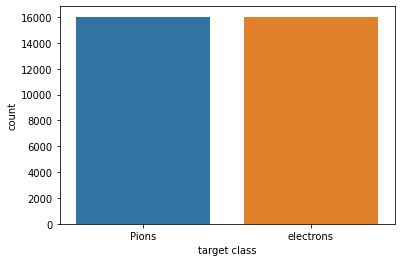

In [14]:
# Ratio of electrons and pions
ratio=df['target'].value_counts()
print(ratio)
x=['Pions','electrons']
sns.barplot(x=x,y=ratio)
plt.ylabel("count")
plt.xlabel("target class")
plt.show()

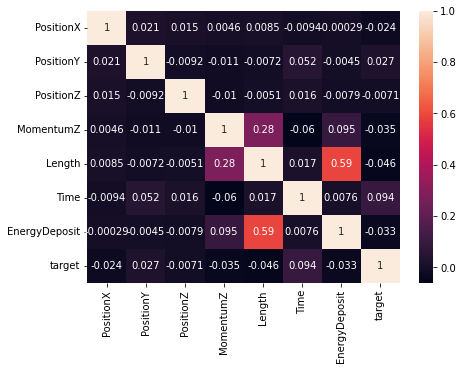

In [15]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

we will train simple ML model (Logistic Regression,Random Forest) with default parameters to get a benchmark of what could be the accurcay of the models, then we can train Deep Learning models and comapre both the results

In [16]:
#Dependent and independent features
X=df.drop(columns=["target"])
y=df['target']

In [17]:
#Scaling the values in the column to mean =0 and variance =1
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [18]:
#Train test split 0.2 of 65414=13082
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=35)

In [19]:
print(f"The shape of X train is {x_train.shape}")
print(f"The shape of X test is {x_test.shape}")

The shape of X train is (25651, 7)
The shape of X test is (6413, 7)


### Model Training

In [20]:
# utility function
def validation_report(clf,y_test,x_test):
    plot_confusion_matrix(clf,x_test,y_test)
    plt.show()
    pred=clf.predict(x_test)
    print(classification_report(y_test,pred))

#### Logistic Regression

In [21]:
model_logistic=LogisticRegression()
model_logistic.fit(x_train,y_train)

LogisticRegression()

/home/nilay/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


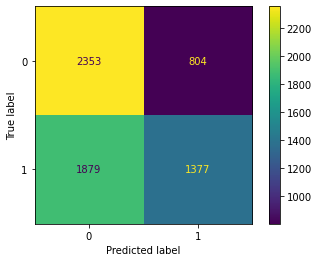

              precision    recall  f1-score   support

           0       0.56      0.75      0.64      3157
           1       0.63      0.42      0.51      3256

    accuracy                           0.58      6413
   macro avg       0.59      0.58      0.57      6413
weighted avg       0.59      0.58      0.57      6413



In [22]:
validation_report(model_logistic,y_test,x_test)

#### Random Forest

In [23]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

/home/nilay/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


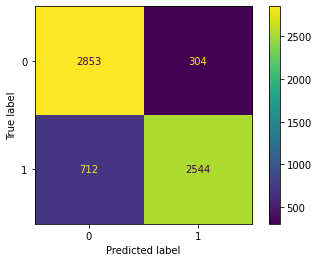

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      3157
           1       0.89      0.78      0.83      3256

    accuracy                           0.84      6413
   macro avg       0.85      0.84      0.84      6413
weighted avg       0.85      0.84      0.84      6413



In [24]:
validation_report(model_rf,y_test,x_test)

### Xgboost

In [25]:
model_xg=xgb.XGBClassifier()
model_xg.fit(x_train,y_train)

[21:54:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/nilay/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

/home/nilay/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


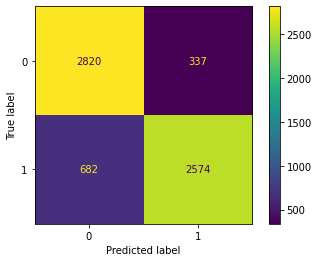

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3157
           1       0.88      0.79      0.83      3256

    accuracy                           0.84      6413
   macro avg       0.84      0.84      0.84      6413
weighted avg       0.85      0.84      0.84      6413



In [26]:
validation_report(model_xg,y_test,x_test)

# ROC AUC 

In [27]:
def roc_plot(y_test,predictions):
  fpr, tpr, thresholds=roc_curve(y_test,predictions)
  plt.figure(figsize=(7,7))
  plt.plot([0, 1], [0, 1], '--',color='red',label='Thresold')
  plt.plot(fpr, tpr,color='blue',label='Custom_svm')
  plt.ylabel('True positive rate(Recall)')
  plt.xlabel('False positive rate')
  plt.title('ROC')
  plt.grid()
  plt.legend()
  plt.show()
  print(f"The fpr is {fpr}, the tpr is {tpr}")

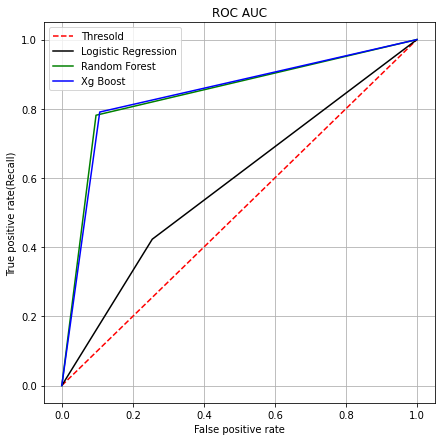

In [28]:
y_logist=model_logistic.predict(x_test)
y_rf=model_rf.predict(x_test)
y_xg=model_xg.predict(x_test)

fpr_logist, tpr_logist ,thresholds2=roc_curve(y_test,y_logist)
fpr_rf, tpr_rf, thresholds3=roc_curve(y_test,y_rf)
fpr_xg, tpr_xg, thresholds4 =roc_curve(y_test,y_xg)

plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], '--',color='red',label='Thresold')
plt.plot(fpr_logist, tpr_logist,color='black',label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf,color='green',label='Random Forest')
plt.plot(fpr_xg, tpr_xg,color='Blue',label='Xg Boost')
plt.ylabel('True positive rate(Recall)')
plt.xlabel('False positive rate')
plt.title('ROC AUC')
plt.grid()
plt.legend()
plt.show()